# Lista 8 (10 pkt.)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 (2 pkt.)

Napisz funkcję **gen(a,b,p)**, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [4]:
def gen(a, b, p):
    result = []
    for x in range(p):
        y_squared = (x**3 + a*x + b) % p
        for y in range(p):
            if (y**2) % p == y_squared:
                result.append([x, y])
    return result

In [5]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję **add(P,Q,a,p)**, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

$$x_3 = \left(s^2-x_1-x_2\right) \mod p$$
$$y_3 = \left(s\left(x_1-x_3\right)-y_1 \right) \mod p$$

$$s=\frac{y_2-y_1}{x_2-x_1} \mod p \quad P\neq Q$$
$$s=\frac{3x_1^2+a}{2y_1} \mod p \quad P=Q$$

$(x_3, y_3)$ to współrzędne punktu będącego sumą punktów $(x_1, y_1)$ i $(x_2, y_2)$. Natomiast $a$ to współczynnik z równania krzywej.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję **inv** z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako **nan**, tj. za pomocą **float('nan')**, do sprawdzania czy coś jest **nan** użyj **np.isnan()**.

In [6]:
def inv(p, n):
    if p == 0:
        return float('nan')

    s0, s1 = 1, 0
    t0, t1 = 0, 1

    while n != 0:
        div = p // n
        s0, s1 = s1, s0 - (div * s1)
        t0, t1 = t1, t0 - (div * t1)
        p, n = n, p % n

    return s0 + s1 if s0 < 0 else s0

In [7]:
def add(P, Q, a, p):
    x1, y1 = P
    x2, y2 = Q

    if P == Q:
        if y1 != 0:
            s = (x1**2 * 3 + a) * inv(2 * y1, p) % p
        else:
            return [float('nan'), float('nan')]
    elif np.isnan(x1) and np.isnan(y1):
        return Q
    elif np.isnan(x2) and np.isnan(y2):
        return P
    else:
        diff = x2 - x1
        if diff != 0:
            s = (y2 - y1) * inv(diff, p) % p
        else:
            return [float('nan'), float('nan')]

    x3 = (s ** 2 - x1 - x2) % p
    y3 = (s * (x1 - x3) - y1) % p

    return [x3, y3]

In [8]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


W oparciu o poprzednią funkcję napisz funkcję **multiply(n,P,a,p)**, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [9]:
def multiply(n, P, a, p):
    result = P

    if np.isnan(P[0]) and np.isnan(P[1]):
        return result

    for _ in range(n - 1):
        result = add(result, P, a, p)

    return result

In [10]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty (**plt.scatter()**) reprezentujące krzywą eliptyczną. Stosując funkcję **multiply()** przeanalizuj jaką grupę generuje każdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3-5x$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="fig.png" width="500"/>

Punkt $P_0$ generuje dwuelementową grupę:

{$P_0,\mathcal{O}$},

bo $2P_0=\mathcal{O}$,

punkt $P_1$ generuje pięcioelementową grupę:

{$P_1,P_3,P_4,P_2,\mathcal{O}$}

bo $2P_1=P_3,3P_1=P_4,4P_1=P_2,5P_1=\mathcal{O}$

pozostałe elementy $P_2,P_3,P_4$ generują dokładnie tą samą grupę, zatem na tej krzywej mamy określone dwie grupy jedną dwuelementową i jedną pięcioelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3-2x+1$

## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji **gen()**, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

In [11]:
from sympy import primerange
prime = list(primerange(0, 1000))

lub jakkolwiek inaczej.

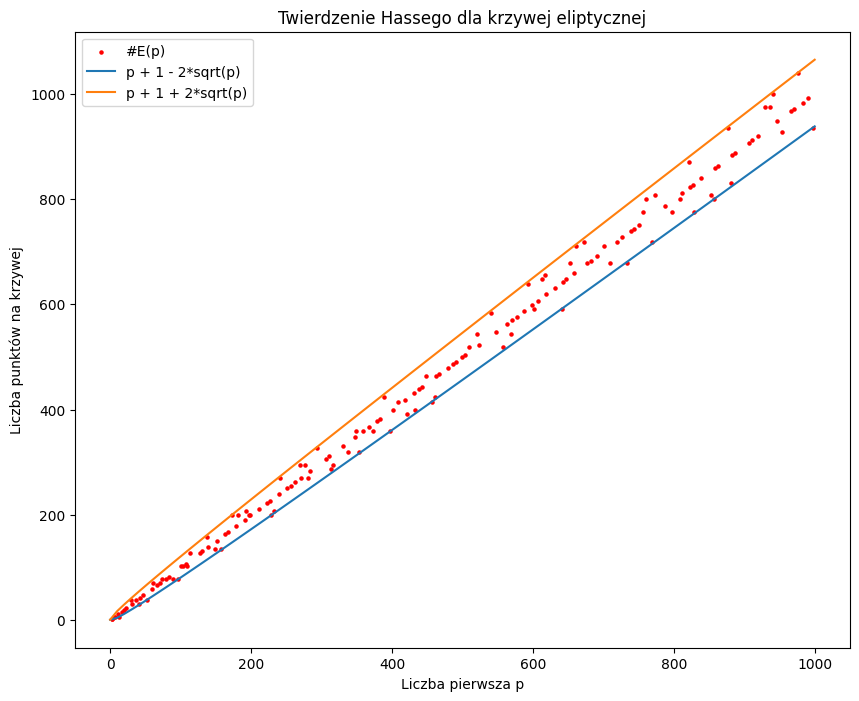

In [29]:
a = -1
b = 0

num_points = []
lower = []
upper = []

for p in prime:
    points = gen(a, b, p)
    num_points.append(len(points))

y_range = range(0, 1010, 10)
for x in y_range:
    lower.append(x + 1 - 2 * np.sqrt(x))
    upper.append(x + 1 + 2 * np.sqrt(x))

plt.figure(figsize=(10, 8))
plt.scatter(prime, num_points, color='r', s=5, label='#E(p)')
plt.plot(y_range, lower, label='p + 1 - 2*sqrt(p)')
plt.plot(y_range, upper, label='p + 1 + 2*sqrt(p)')

plt.title('Twierdzenie Hassego dla krzywej eliptycznej')
plt.xlabel('Liczba pierwsza p')
plt.ylabel('Liczba punktów na krzywej')
plt.legend()
plt.show()

## Zadanie 5 (2 pkt.)

Napisz funkcję **ord(G,a,p)** znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [31]:
def ord(G, a, p):
    result = G
    n = 1

    while not (np.isnan(result[0]) and np.isnan(result[1])):
        result = add(result, G, a, p)
        n += 1

    return n

In [32]:
print(ord([4,4],-1,11)==3)
print(ord([8,8],-1,11)==6)
print(ord([3,2],-1,7)==3)
print(ord([3,5],-1,7)==3)
print(ord([3,2],0,5)==3)
print(ord([0,0],0,5)==2)

True
True
True
True
True
True


## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$, $b$, $p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [15]:
a = None
b = None
G = None
p = None

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [16]:
n=None

Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [17]:
A=None

To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [18]:
m=None
B=None

Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [19]:
k_B=None
k_A=None

In [20]:
k_A==k_B

True

Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.